In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
assert tf.__version__>='2.0'

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
keras.__version__

'2.3.0-tf'

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

In [ ]:
BATCH_SIZE=64
train_data=train_data.shuffle(1000).batch(BATCH_SIZE).prefetch(1)

In [ ]:
next(iter(train_data))

(<tf.Tensor: shape=(64, 28, 28), dtype=uint8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0

In [ ]:
x_train[:50000].shape

(50000, 28, 28)

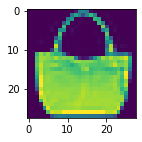

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[100]/255.0)
plt.show()

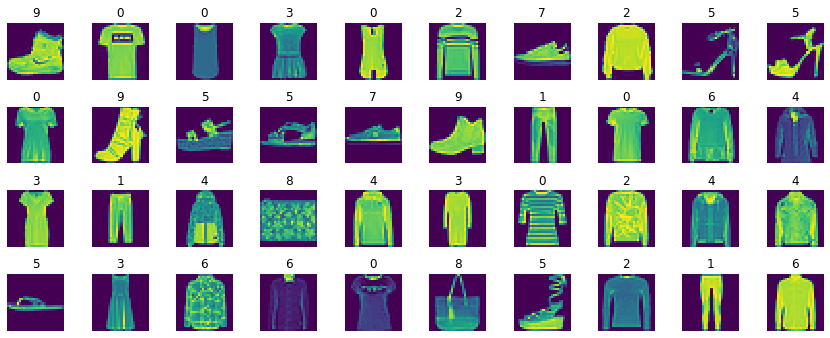

In [ ]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range (n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(x_train[index],interpolation='nearest')
    plt.axis('off')
    plt.title(y_train[index],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.tight_layout()
plt.show()    

In [ ]:
sample_input=tf.keras.layers.Input(shape=[28,28])

In [ ]:
sample_input

<tf.Tensor 'input_1:0' shape=(None, 28, 28) dtype=float32>

In [ ]:
input_A=tf.keras.layers.Input(shape=[5],name='wide_input')
input_B=tf.keras.layers.Input(shape=[6],name='deep_input')
hidden1=tf.keras.layers.Dense(30,activation='relu')(input_B)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([input_A,hidden2])
output=tf.keras.layers.Dense(10,name='output')(concat)
model=tf.keras.Model(inputs=[input_A,input_B],outputs=[output])

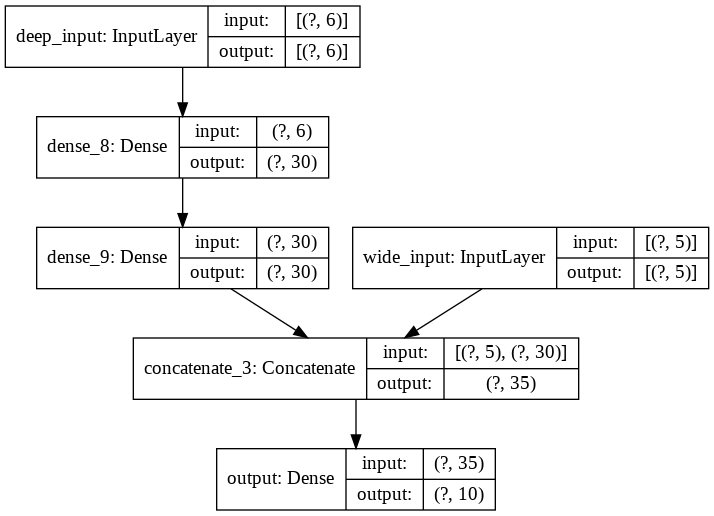

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [ ]:
import numpy as np

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train/255.0,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7041 - accuracy: 0.7699
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4761 - accuracy: 0.8354
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4331 - accuracy: 0.8499
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4066 - accuracy: 0.8576
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3880 - accuracy: 0.8634
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3707 - accuracy: 0.8697
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3576 - accuracy: 0.8735
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3465 - accuracy: 0.8776
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3352 - accuracy: 0.8809
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.326